In [82]:
from PIL import Image
from IPython.display import display
import numpy as np
from skimage.filters import threshold_otsu
import cv2

In [1]:
import sqlite3
import pandas as pd
import geopandas as gpd
from shapely import wkb

# Path to your GeoPackage file
filepath = "..\\data\\inputs\\Three_Rivers_GVI.gpkg"

# Connect to the GeoPackage using sqlite3
conn = sqlite3.connect(filepath)

# List all tables (layers) in the GeoPackage
tables_query = "SELECT table_name FROM gpkg_contents WHERE data_type = 'features';"
tables = pd.read_sql_query(tables_query, conn)
print("Available layers:", tables['table_name'].tolist())

# Read a specific layer
layer_name = tables['table_name'][0]  # Replace with the desired layer name
data_query = f"SELECT * FROM {layer_name};"
data = pd.read_sql_query(data_query, conn)

# Close the connection
conn.close()

Available layers: ['Three_Rivers_GVI']


In [181]:
base_image_loc = 'D:\\projects\\street-view-green-view\\data\\raw\\mapillary\\'
new_image_loc = 'D:\\projects\\street-view-green-view\\data\\raw\\mapillary_resequenced\\'

In [6]:
data.describe()

,fid,osm_id,gvi_score
count,4960.000000,4.960000e+03,2613.000000
mean,2480.500000,1.117576e+08,11.501559
std,1431.972998,2.106419e+08,5.794389
min,1.000000,1.796249e+07,0.895839
25%,1240.750000,1.796544e+07,7.259199
50%,2480.500000,1.796700e+07,10.572398
75%,3720.250000,1.341508e+08,14.774776
max,4960.000000,1.173386e+09,99.824791


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4960 entries, 0 to 4959
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   fid         4960 non-null   int64  
 1   geom        4960 non-null   object 
 2   osm_id      4960 non-null   int64  
 3   highway     4960 non-null   object 
 4   image_id    2613 non-null   object 
 5   image_lat   2613 non-null   object 
 6   image_lon   2613 non-null   object 
 7   residual    2613 non-null   object 
 8   image_path  4960 non-null   object 
 9   error       0 non-null      object 
 10  filename    2613 non-null   object 
 11  gvi_score   2613 non-null   float64
dtypes: float64(1), int64(2), object(9)
memory usage: 465.1+ KB


In [28]:
df = data[data['image_id'].isna() == False].sort_values('gvi_score', ascending=False).reset_index(drop=True)

<Axes: title={'center': 'GVI Index values over 2600 images'}>

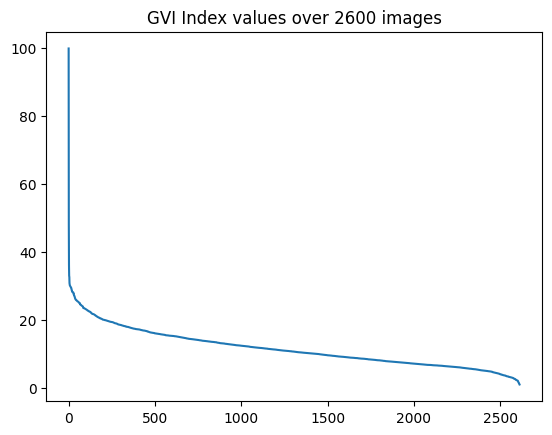

In [193]:
df['gvi_score'].plot(title="GVI Index values over 2600 images")

## resequence images from most to least green via filename

In [174]:
df['gvi_score_int'] = df['gvi_score'].astype(int)

In [184]:
import os
import shutil

def resequence_images():
    # Providing the folder path
    #origin = 'C:\Users\Lenovo\Downloads\Works'
    #target = 'C:\Users\Lenovo\Downloads\Work TP'
    
    #shutil.copy(origin+file_name, target+file_name)



    filenames = df['filename']
    gvis = df['gvi_score_int']
    i=0
    for f in filenames:
        
        front_filename = str(i).rjust(5, '0')
        back_filename = f"_{str(gvis[i]).rjust(5, '0')}_{f}"
        full_filename = f"{front_filename}{back_filename}"
        
        origin = f'{base_image_loc}{f}'
        
        target = f'{new_image_loc}{full_filename}'
        #print(f'{origin} -> {target}')
        shutil.copy(origin, target)

        
        i+=1


resequence_images()


SyntaxError: invalid syntax (4278415656.py, line 33)

In [35]:

df[['gvi_score']].quantile(q=0.9)

gvi_score    19.113961
Name: 0.9, dtype: float64

In [118]:
def display_image(filename):
    base_image_loc = 'D:\\projects\\street-view-green-view\\data\\raw\\mapillary\\'
    img = Image.open(f'{base_image_loc}{filename}')
    img_resized = img.resize((400, 200))
    display(img_resized)



0
99.82479142554013
518953222454873.jpeg


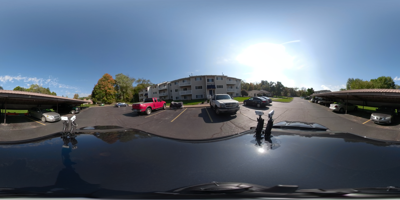

1
48.07425491898148
3724044271054354.jpeg


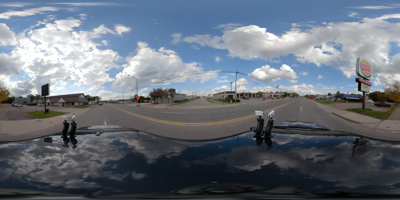

2
36.048195167824076
801889290453514.jpeg


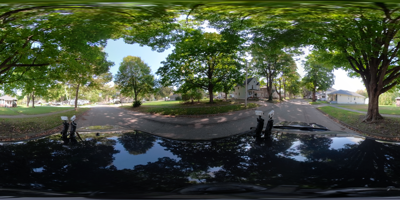

3
32.88454861111111
348612820196956.jpeg


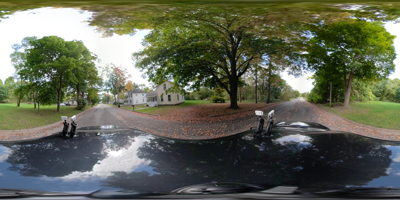

4
32.52460696373457
457615722201014.jpeg


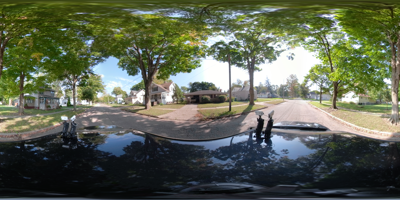

In [198]:
n=5
for i in range(n):
    print(i)
    print(df.loc[i].gvi_score)
    print(f"{df.loc[i].filename}")
    display_image(df.loc[i].filename)




2612
0.8958393614969137
757453931598742.jpeg


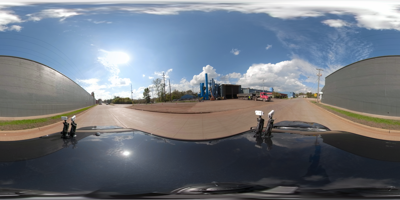

2611
1.0203149112654322
586514342338532.jpeg


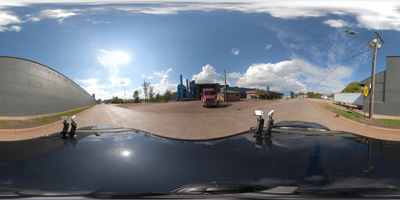

2610
1.0939790702160495
218869059696777.jpeg


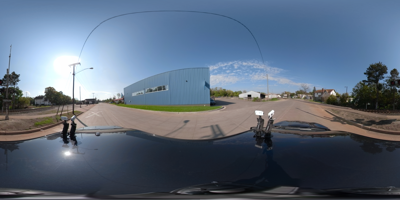

2609
1.1623685860339505
762821141098652.jpeg


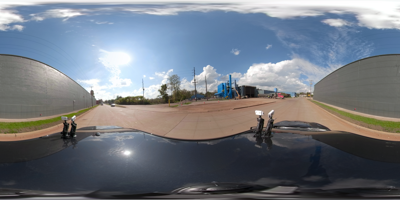

2608
1.3868091724537037
148795987256920.jpeg


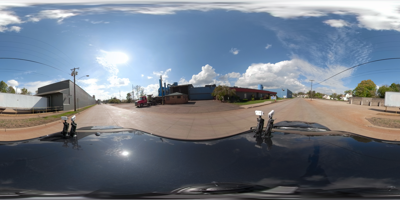

In [121]:
n=5
for i in range(n):
    i = len(df) - (i +1)
    print(i)
    print(df.loc[i].gvi_score)
    print(df.loc[i].filename)
    display_image(df.loc[i].filename)

In [63]:
df

,fid,geom,osm_id,highway,image_id,image_lat,image_lon,residual,image_path,error,filename,gvi_score
0,2178,b'GP\x00\x01\xe6\x10\x00\x00\x01\x01\x00\x00\x...,170995908,residential,518953222454873,41.939283055556,-85.634463888889,1.6912447309686,data\raw\mapillary\518953222454873.jpeg,None,518953222454873.jpeg,99.824791
1,3589,b'GP\x00\x01\xe6\x10\x00\x00\x01\x01\x00\x00\x...,203968024,residential,3724044271054354,41.942519444389,-85.646913888889,2.586088850538953,data\raw\mapillary\3724044271054354.jpeg,None,3724044271054354.jpeg,48.074255
2,1224,b'GP\x00\x01\xe6\x10\x00\x00\x01\x01\x00\x00\x...,17966878,residential,801889290453514,41.936738611111,-85.638783333333,2.986843046547933,data\raw\mapillary\801889290453514.jpeg,None,801889290453514.jpeg,36.048195
3,1363,b'GP\x00\x01\xe6\x10\x00\x00\x01\x01\x00\x00\x...,17965088,residential,348612820196956,41.938911111056,-85.623533333278,2.131234900670862,data\raw\mapillary\348612820196956.jpeg,None,348612820196956.jpeg,32.884549
4,1237,b'GP\x00\x01\xe6\x10\x00\x00\x01\x01\x00\x00\x...,17966878,residential,457615722201014,41.938469444444,-85.638722222222,3.336897980117353,data\raw\mapillary\457615722201014.jpeg,None,457615722201014.jpeg,32.524607
...,...,...,...,...,...,...,...,...,...,...,...,...
2608,4046,b'GP\x00\x01\xe6\x10\x00\x00\x01\x01\x00\x00\x...,17965023,residential,148795987256920,41.938496944389,-85.629741666611,3.26677298106424,data\raw\mapillary\148795987256920.jpeg,None,148795987256920.jpeg,1.386809
2609,4043,b'GP\x00\x01\xe6\x10\x00\x00\x01\x01\x00\x00\x...,17965023,residential,762821141098652,41.938038611056,-85.629744444389,2.717271558189847,data\raw\mapillary\762821141098652.jpeg,None,762821141098652.jpeg,1.162369
2610,4052,b'GP\x00\x01\xe6\x10\x00\x00\x01\x01\x00\x00\x...,17965023,residential,218869059696777,41.939272222222,-85.629733055556,1.434629528067031,data\raw\mapillary\218869059696777.jpeg,None,218869059696777.jpeg,1.093979
2611,4045,b'GP\x00\x01\xe6\x10\x00\x00\x01\x01\x00\x00\x...,17965023,residential,586514342338532,41.938341666611,-85.629738611056,1.021055689556757,data\raw\mapillary\586514342338532.jpeg,None,586514342338532.jpeg,1.020315


In [80]:
def get_gvi_score(image_path):
    """
    Calculate the Green View Index (GVI) for a given image file.

    Args:
        image_path (str): Path to the image file.

    Returns:
        float: The Green View Index (GVI) score for the given image.
    """
    # Load the image
    original_image = cv2.imread(image_path)

    # Convert to RGB color space
    rgb_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB)

    # Calculate ExG (Excess Green)
    r, g, b = cv2.split(rgb_image.astype(np.float32) / 255)
    exg = 2 * g - r - b

    # Apply Otsu's thresholding on ExG
    threshold = threshold_otsu(exg)
    green_pixels = (exg > threshold).sum()
    total_pixels = original_image.shape[0] * original_image.shape[1]

    # Calculate the Green View Index (GVI)
    gvi_score = (green_pixels / total_pixels) * 100

    return gvi_score

In [191]:
get_gvi_score('D:\\projects\\street-view-green-view\\data\\raw\\mapillary\\518953222454873.jpeg')

get_gvi_score('D:\\projects\\geo_image_experiments\\data\\reference_images\\green_shading.jpeg')



72.19398340248962

In [162]:
def get_gvi_score_components(image_path):
    """
    Calculate the Green View Index (GVI) for a given image file.

    Args:
        image_path (str): Path to the image file.

    Returns:
        float: The Green View Index (GVI) score for the given image.
    """
    # Load the image
    original_image = cv2.imread(image_path)

    # Convert to RGB color space
    rgb_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB)
    print(len(rgb_image))
    print(len(rgb_image[0]))

    
    # Calculate ExG (Excess Green)
    r, g, b = cv2.split(rgb_image.astype(np.float32) / 255)
    #print(f"R: {r}\n\nG{g}\n\nB{b}")
    print(r.shape)
    print(g.shape)
    print(b.shape)
    
    exg = 2 * g - r - b

    print(f"EXG shape: {exg.shape}")

    # Apply Otsu's thresholding on ExG
    threshold = threshold_otsu(exg)

    print(f"t: {threshold}")
    
    green_pixels = (exg > threshold).sum()
    print(exg > threshold)
    print(exg)
    
    print(green_pixels)
    total_pixels = original_image.shape[0] * original_image.shape[1]
    print(f"Orig Shape 0: {original_image.shape[0]}")
    print(f"Orig Shape 1: {original_image.shape[1]}")

    # Calculate the Green View Index (GVI)
    gvi_score = (green_pixels / total_pixels) * 100

    return gvi_score

In [163]:
get_gvi_score_components('D:\\projects\\street-view-green-view\\data\\raw\\mapillary\\518953222454873.jpeg')

2880
5760
(2880, 5760)
(2880, 5760)
(2880, 5760)
EXG shape: (2880, 5760)
t: -0.39614740014076233
[[ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 ...
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]]
[[-0.03529406 -0.03529406 -0.03529406 ... -0.02352935 -0.02352935
  -0.02352935]
 [-0.03529406 -0.03529406 -0.03529406 ... -0.03529406 -0.03529406
  -0.03529406]
 [-0.03529406 -0.03529406 -0.03529406 ... -0.03529406 -0.03529406
  -0.03529406]
 ...
 [ 0.02352941  0.02352941  0.02352941 ...  0.00784314  0.00784314
   0.00784314]
 [ 0.00392157  0.00392157  0.00392157 ...  0.00784314  0.00784314
   0.00784314]
 [ 0.01176471  0.01176471  0.01176471 ... -0.00392157 -0.00392157
  -0.00392157]]
16559735
Orig Shape 0: 2880
Orig Shape 1: 5760


99.82479142554013

# show sample images with Otsu's threshold

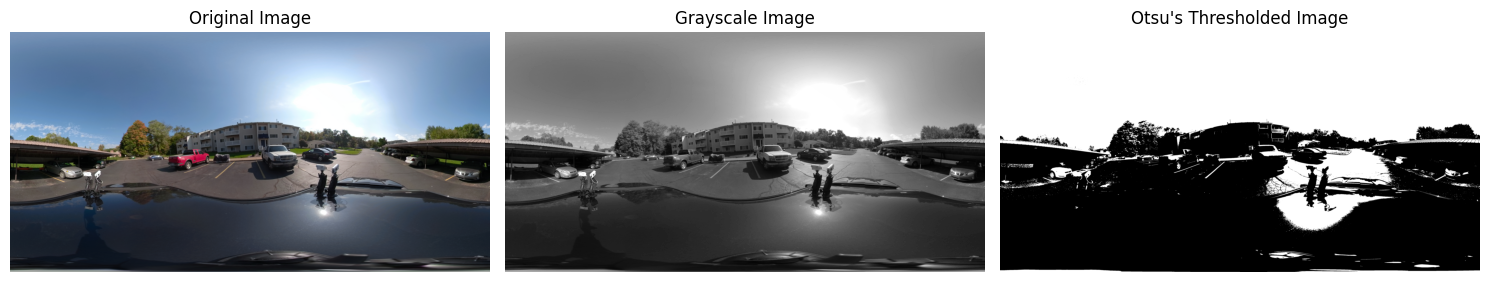

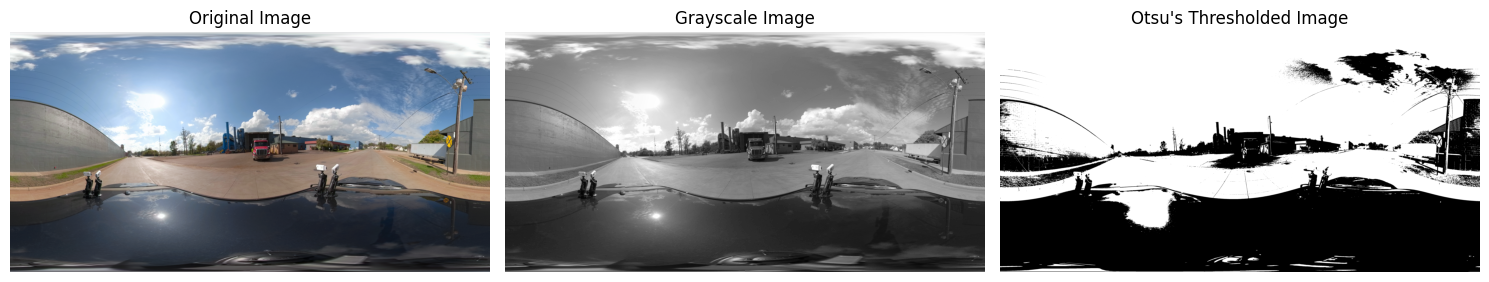

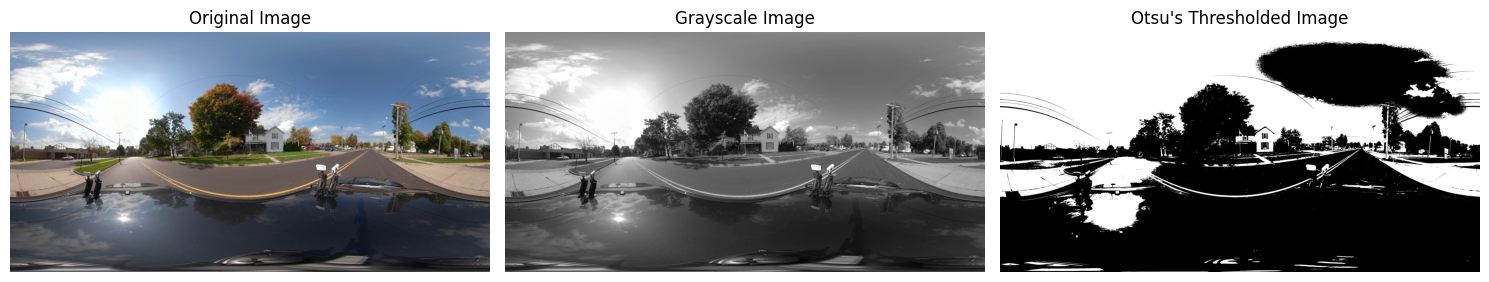

In [186]:
def display_3_image_flavors(filename):
    base_image_loc = 'D:\\projects\\street-view-green-view\\data\\raw\\mapillary_resequenced\\'
    image_path = f"{base_image_loc}{filename}"

    plt.figure(figsize=(15, 5))
    
    plt.subplot(1, 3, 1)
    image = cv2.imread(image_path)
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    ret, otsu_threshold = cv2.threshold(gray_image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    #cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title('Original Image')
    plt.axis('off')
    
    plt.subplot(1, 3, 2)
    plt.imshow(gray_image, cmap='gray')
    plt.title('Grayscale Image')
    plt.axis('off')
    
    plt.subplot(1, 3, 3)
    plt.imshow(otsu_threshold, cmap='gray')
    plt.title("Otsu's Thresholded Image")
    plt.axis('off')
    
    plt.tight_layout()
    plt.show()

for e in ['00000_00099_518953222454873.jpeg','02611_00001_586514342338532.jpeg','02347_00005_301456454842169.jpeg']:
    display_3_image_flavors(e)



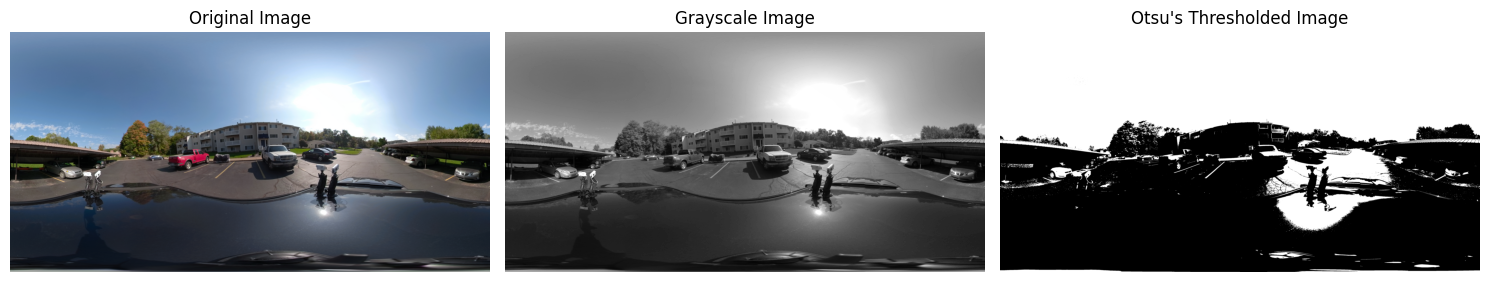

In [110]:
import matplotlib.pyplot as plt
image_path = 'D:\\projects\\street-view-green-view\\data\\raw\\mapillary\\518953222454873.jpeg'
#image_path = 'D:\\projects\\street-view-green-view\\data\\raw\\mapillary\\801889290453514.jpeg'

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
image = cv2.imread(image_path)
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
ret, otsu_threshold = cv2.threshold(gray_image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
#cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(gray_image, cmap='gray')
plt.title('Grayscale Image')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(otsu_threshold, cmap='gray')
plt.title("Otsu's Thresholded Image")
plt.axis('off')

plt.tight_layout()
plt.show()

## See how elements in the arrays actually map to the image

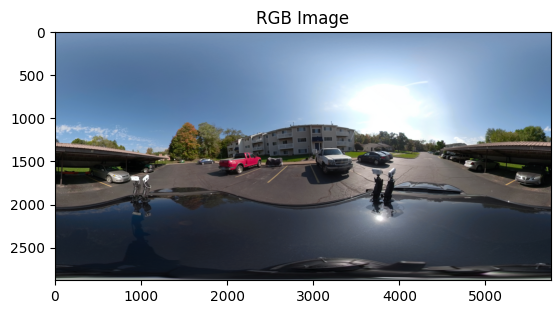

Pixel value at (100, 50): [113 143 179]


In [111]:
# Load the image
image_path = 'D:\\projects\\street-view-green-view\\data\\raw\\mapillary\\518953222454873.jpeg'
original_image = cv2.imread(image_path)

# Convert from BGR to RGB
rgb_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB)

# Display the image using matplotlib
plt.imshow(rgb_image)
plt.title('RGB Image')
plt.axis('on')  # Show the axis to see pixel coordinates
plt.show()

# Access specific pixel value (for example, pixel at row 100, column 50)
pixel_value = rgb_image[100, 50]
print(f'Pixel value at (100, 50): {pixel_value}')

In [117]:
x = 100
y = 2550
pixel_value = rgb_image[x, y]
print(f'Pixel value at ({x}, {y}): {pixel_value}')

Pixel value at (100, 2550): [119 152 187]


In [126]:
(304 - 119 - 187) / 256


-0.0078125

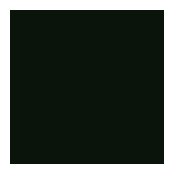

In [188]:
# Define a function to display a color patch
def show_color(rgb_tuple):
    fig, ax = plt.subplots(figsize=(2, 2), subplot_kw={'xticks': [], 'yticks': [], 'frame_on': False})
    
    # Create an array with the specified RGB color
    color_array = np.zeros((10, 10, 3), dtype=np.uint8)
    color_array[:, :] = rgb_tuple
    
    # Display the color
    ax.imshow(color_array)
    plt.show()

# Example usage
rgb_color = (10, 20, 10)  # Red color
show_color(rgb_color)
